In [112]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [9]:
# Read Data
df = pd.read_csv('/Users/kavan/Downloads/movies.csv')

In [11]:
# Looking at the data 
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
# Missing data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(f"{col} - {percent_missing}%")
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [28]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [30]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [66]:
print(df.isna().sum())
print(np.isinf(df['gross']).sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64
0


In [78]:
df = df.fillna(0)

In [84]:
df = df.replace([np.inf, -np.inf], 0)

In [86]:
print(df.isna().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [94]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')


In [96]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0


In [124]:
# New column extracting year from released
df['correctyear'] = df['released'].str.extract(r'(\d{4})')


In [168]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [136]:
pd.set_option('display.max_rows', 1000) # put "none" instead of 1000 to get whole dataset

In [138]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,0,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,0,90.0,2020
7664,Dream Round,0,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,0,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0.0,2020
7666,It's Just Us,0,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,0,120.0,2020


In [156]:
# Drop duplicates
df['name'].drop_duplicates().sort_values()

In [162]:
df.sample(n=20)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
4096,Blade II,R,Action,2002,"March 22, 2002 (United States)",6.7,204000,Guillermo del Toro,Marv Wolfman,Wesley Snipes,Germany,54000000,155010032,New Line Cinema,117.0,2002
941,Solarbabies,PG-13,Action,1986,"November 26, 1986 (United States)",4.8,4100,Alan Johnson,Walon Green,Richard Jordan,United States,25000000,1579260,Brooksfilms,94.0,1986
2584,Death Wish: The Face of Death,R,Action,1994,"January 14, 1994 (United States)",4.9,7200,Allan A. Goldstein,Brian Garfield,Charles Bronson,Canada,5000000,1702394,21st Century Films,95.0,1994
1910,Ricochet,R,Action,1991,"October 4, 1991 (United States)",6.2,17000,Russell Mulcahy,Fred Dekker,Denzel Washington,United States,0,21756163,Home Box Office (HBO),102.0,1991
3927,Fat Girl,Not Rated,Drama,2001,"March 7, 2001 (France)",6.5,11000,Catherine Breillat,Catherine Breillat,Anaïs Reboux,France,0,765705,Arte France Cinéma,86.0,2001
5679,127 Hours,R,Biography,2010,"January 28, 2011 (United States)",7.5,356000,Danny Boyle,Danny Boyle,James Franco,United States,18000000,60738797,Fox Searchlight Pictures,94.0,2011
2991,The Whole Wide World,PG,Biography,1996,"December 20, 1996 (United States)",7.1,3500,Dan Ireland,Novalyne Price Ellis,Vincent D'Onofrio,United States,1300000,375757,Cineville,111.0,1996
5752,Dinner for Schmucks,PG-13,Comedy,2010,"July 30, 2010 (United States)",5.9,103000,Jay Roach,David Guion,Steve Carell,United States,69000000,86855739,Paramount Pictures,114.0,2010
7315,Mary Queen of Scots,R,Biography,2018,"December 21, 2018 (United States)",6.3,45000,Josie Rourke,Beau Willimon,Saoirse Ronan,United Kingdom,25000000,46712809,Focus Features,124.0,2018
5470,The Twilight Saga: New Moon,PG-13,Adventure,2009,"November 20, 2009 (United States)",4.7,271000,Chris Weitz,Melissa Rosenberg,Kristen Stewart,United States,50000000,711025481,Temple Hill Entertainment,130.0,2009


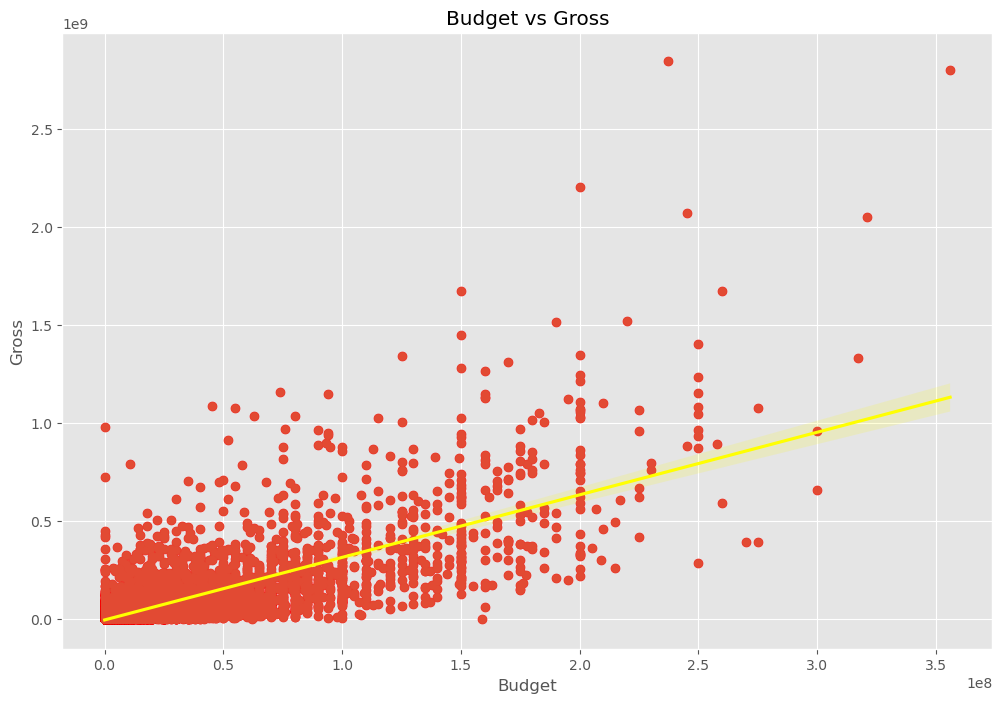

In [196]:
# Scatter plot budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()


In [170]:
df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,0,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990


In [194]:
# budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"yellow"})

<Axes: xlabel='budget', ylabel='gross'>

In [213]:
#correlation matrix
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)

             year     score     votes    budget     gross   runtime
year     1.000000  0.092616  0.222427  0.309212  0.261900  0.116358
score    0.092616  1.000000  0.407101  0.056863  0.186012  0.394564
votes    0.222427  0.407101  1.000000  0.486931  0.632870  0.306984
budget   0.309212  0.056863  0.486931  1.000000  0.750157  0.268372
gross    0.261900  0.186012  0.632870  0.750157  1.000000  0.244339
runtime  0.116358  0.394564  0.306984  0.268372  0.244339  1.000000


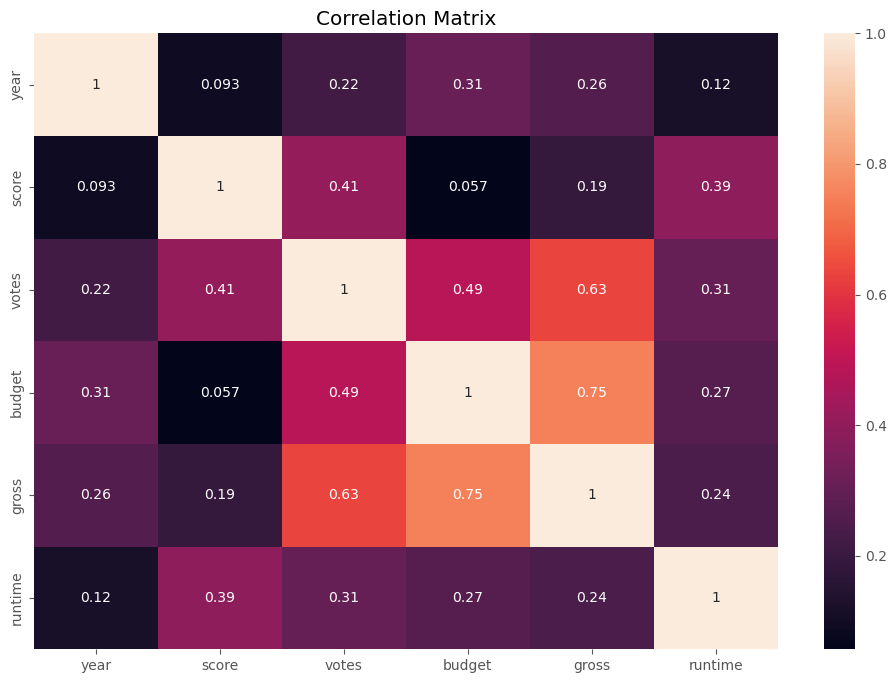

In [223]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [247]:
df_numerized = df.sort_values(by=['gross'], ascending=False)
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correctyear
5445,533,6,0,2009,697,7.8,1100000,1155,1779,2335,56,237000000,2847246203,2254,162.0,29
7445,535,6,0,2019,184,8.4,903000,162,744,2242,56,356000000,2797501328,1607,181.0,39
3045,6896,6,6,1997,705,7.8,1100000,1155,1779,1596,56,200000000,2201647264,2254,194.0,17
6663,5144,6,0,2015,699,7.8,876000,1125,2551,525,56,245000000,2069521700,1541,138.0,35
7244,536,6,0,2018,193,8.4,897000,162,744,2242,56,321000000,2048359754,1607,149.0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201,7211,7,3,1987,846,6.6,3300,66,3781,702,56,5800000,0,1324,94.0,7
1199,7208,5,4,1987,84,4.8,1400,1877,3646,463,56,0,0,1638,86.0,7
1192,7336,7,10,1987,1755,6.2,2200,745,683,597,55,0,0,1682,110.0,7
1184,1355,7,10,1987,2915,4.0,2100,613,926,1628,56,75000,0,2220,72.0,7


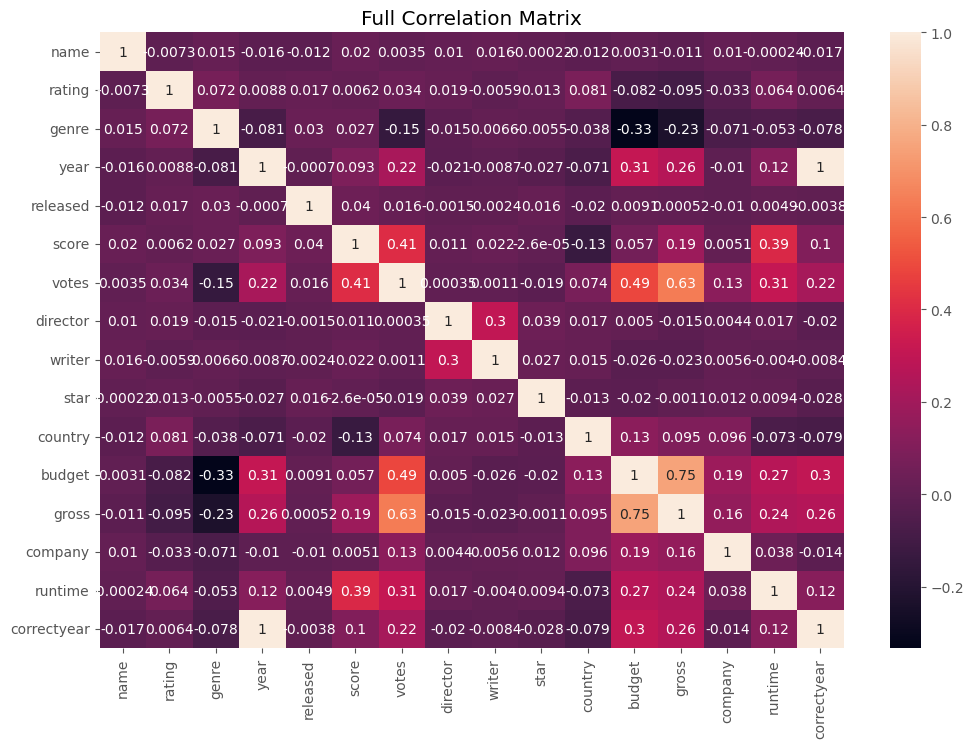

In [249]:
full_correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(full_correlation_matrix, annot=True)
plt.title('Full Correlation Matrix')
plt.show()

In [235]:
corr_mat = df_numerized.corr()

In [241]:
sorted_pairs = corr_mat.unstack().sort_values()

In [243]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
print(high_corr)

votes        gross          0.632870
gross        votes          0.632870
budget       gross          0.750157
gross        budget         0.750157
correctyear  year           0.996397
year         correctyear    0.996397
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
correctyear  correctyear    1.000000
dtype: float64
